<img src="Mercedes Benz AMG63.jpg" />


<center><h1 Style="color:#1E90FF">Análisis de Datos</h1></center>
<center><h5>Universidad Castro Carazo</h5> </center>
<center><h6>1C - 2023</h6> </center>
</br>
<p Style="text-align: justify"> Este notebook contiene el análisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular.Como se puede incrementar las ventas de autos de segunda mano? Para esto se realiza un análisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de decisiones</p>

</br>
<a href = "https://archive.ics.uci.edu/ml/datasets/Automobile"> Fuente de datos para el proceso de análisis </a>

<h2 Style= "color:#008B8B">1.Cargar y estandarizar los set de datos</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
   <li>Importar las librerías de Python necesarias</li>
   <li>Importar el o los set de datos</li>
   <li>Revisar los encabezados de los DataFrames</li>
   <li>Si sólo si tenemos más de 1 set de datos, los vamos a unir en uno solo</li>
</ol>

<h3 Style = "color:#DC143C">1.1) Importar las librerías de Python necesarias</h3>

In [1]:
import pandas as pd #Se usa para el manejo de grandes volumenes de datos - DataFrame
import numpy as np # Se usa para el manejo de estructuras de datos: Tuplas, listas, Diccionarios
import matplotlib as mpl
import matplotlib.pyplot as plt #Permite crear gráficos.
import seaborn as sns #Permite crear gráficos.

<h4 Style = "color:#DC143C">1.1.1) Configuración de parametros de gráficos</h4>

In [2]:
mpl.rcParams["axes.spines.bottom"]= True
mpl.rcParams["axes.spines.left"]= False
mpl.rcParams["axes.spines.right"]= False
mpl.rcParams["axes.spines.top"]= False

<h3 Style = "color:#696969">1.2) Importar el o los set de datos</h3>


In [3]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_set = pd.read_csv("autos.csv", names = cols)
df_2do_set = pd.read_csv("Autos1.csv", names = cols)

In [4]:
df_1er_set.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df_1er_set.shape

(197, 26)

In [6]:
df_1er_set.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_1er_set.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df_1er_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

<h3 Style="color:#6495ed"> 1.3 Revisar los encabezados de los DataFrame </h3>
<p> Se motiva la estandarización de los nombres de las columnas, considerando lo siguiente
</p>

<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco</li>
    <li>Los nombres no deben empezar por numeros</li>
    <li>Si el nombre se conforma por 2 o más palabras la letra inicial de cada palabra va en mayuscula</li>
    <li>No deben existir nombres repetidos</li>
<ol>

In [9]:
df_1er_set.columns


Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_2do_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [11]:
df_1er_set.rename({"engine-size": "engineSize"}, axis = 1, inplace = True)
df_2do_set.rename({"engine-size": "engineSize"}, axis = 1, inplace = True)
df_1er_set.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [12]:
df_2do_set.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989


<h3 Style = "color:#696969">1.4) Unir los set de datos</h3>

In [13]:
unionArchivos = [df_1er_set, df_2do_set]
dfAutos = pd.concat(unionArchivos)
dfAutos.shape

(226, 26)

In [14]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h2 Style ="color:#6495ED">2.Manejo de los valores faltantes o perdidos</h2>
</br>
<p>Que se hace en este etapa?</p>
</br>
<ol>
    <li>Indentificar como se muestran los valores faltantes y estandarizarlos a NaN</li>
    <li>Contar la cantidad de valores faltantes por variables</li>
    <li>Analizar la imputación de valores númericos (con la media)</li>
        <li>Analizar la imputación de valores categoricos (con valor más frecuente / max)</li>
    <li>Eliminar filas con valores faltantes</li>
<ol>

<h3 Style = "color:#696969">2.1) Identificar como se muestran los valores faltantes</h3>

In [15]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [16]:
dfAutos.replace("?", np.nan, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 Style = "color:#696969">2.2) Contar la cantidad de valores faltantes por variable</h3>

In [17]:
dfValoresFaltantes = dfAutos.isnull()
dfValoresFaltantes.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

<h3 Style = "color:#696969">2.3) Analizar la imputación de valores faltantes</h3>

In [19]:
mean_value = dfAutos["normalized"].astype("float").mean(axis = 0)
print("La media de la fila normalized es:", mean_value)

La media de la fila normalized es: 122.28333333333333


In [20]:
mean_value = dfAutos["bore"].astype("float").mean(axis = 0)
print("La media de la fila bore es:", mean_value)

La media de la fila bore es: 3.319459459459461


In [21]:
mean_value = dfAutos["stroke"].astype("float").mean(axis = 0)
print("La media de la fila stroke es:", mean_value)

La media de la fila stroke es: 3.2785135135135075


In [22]:
mean_value = dfAutos["horsepower"].astype("float").mean(axis = 0)
print("La media de la fila horsepower es:", mean_value)

La media de la fila horsepower es: 102.98214285714286


In [23]:
mean_value = dfAutos["peak"].astype("float").mean(axis = 0)
print("La media de la fila peak es:", mean_value)

La media de la fila peak es: 5100.892857142857


In [24]:
dfAutos["normalized"].replace(np.nan, 122, inplace = True)
dfAutos["bore"].replace(np.nan, 3.31, inplace = True)
dfAutos["stroke"].replace(np.nan, 3.28, inplace = True)
dfAutos["horsepower"].replace(np.nan, 102, inplace = True)
dfAutos["peak"].replace(np.nan, 5100, inplace = True)
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h3 Style = "color:#696969">2.4) Analizar la imputación de valores caracter con el dato más frecuente</h3>

In [25]:
dfAutos["doors"].value_counts().idxmax()

'four'

In [26]:
dfAutos["doors"].replace(np.nan, "four", inplace = True)
dfAutos.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


<h3 Style = "color:#696969">2.5) Eliminar filas con valores faltantes</h3>

In [27]:
dfAutos.dropna(subset = ["price"], axis = 0, inplace = True)
dfAutos.reset_index(drop = True, inplace = True)

In [28]:
dfValoresFaltantes = dfAutos.isnull()
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engineSize
False    222
Name: engineSize, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False    2

<h2 Style= "color:#008B8B">3.Estandarizar de los datos</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
   <li>Verificar el dominio de cada variable y se ajusta si es necesario.</li>
   <li>Se convierten los valores en función de su interpretación.</li>
   <li>Se normalizan los datos para que los valores queden entre 0 y 1 </li>
   <li>Binning crear categorias para el resumen de datos </li>
</ol>

<h3 Style = "color:#0a5483">3.1) Verificar el dominio de las variables </h3>

In [29]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
dfAutos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [31]:
dfAutos[["normalized", "horsepower"]] = dfAutos[["normalized", "horsepower"]].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower       int32
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [32]:
dfAutos[["bore", "stroke", "peak", "price"]] = dfAutos[["bore", "stroke", "peak", "price"]].astype("float")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower       int32
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style = "color:#0a5483">3.2) Conviertir los valores en función de su interpretación. </h3>

In [33]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0


In [34]:
dfAutos["City L/100Km"] = 235/dfAutos["City"] 
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100Km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421


In [35]:
dfAutos["Higway L/100Km"] = 235/dfAutos["Higway"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100Km,Higway L/100Km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


<h3 Style = "color:#0a5483">3.3) Se normalizan los datos para que los valores queden entre 0 y 1. </h3>

In [36]:
dfAutos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100Km,Higway L/100Km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333


In [37]:
dfTemp = dfAutos[["length","width","heingt"]]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [38]:
dfAutos["lengthNorm"] = dfAutos["length"]/dfAutos["length"].max()
dfAutos["widthNorm"] = dfAutos["width"]/dfAutos["width"].max()
dfAutos["heingtNorm"] = dfAutos["heingt"]/dfAutos["heingt"].max()

dfTemp = dfAutos[["lengthNorm","widthNorm","heingtNorm"]]
dfTemp.head(5)

,lengthNorm,widthNorm,heingtNorm
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [39]:
dfAutos.head()

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City L/100Km,Higway L/100Km,lengthNorm,widthNorm,heingtNorm
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027



<h3 Style = "color:#0a5483">3.4) Binning crear categorias para el resumen de datos </h3>

In [40]:
dfTemp = dfAutos[["horsepower"]]
dfTemp.head(5)

,horsepower
0,111
1,111
2,154
3,102
4,115


In [41]:
bins = np.linspace(min(dfAutos["horsepower"]), max(dfAutos["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [42]:
dfAutos.describe()

,symboling,normalized,base,length,width,heingt,curb,engineSize,bore,stroke,...,horsepower,peak,City,Higway,price,City L/100Km,Higway L/100Km,lengthNorm,widthNorm,heingtNorm
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,174.064865,65.836036,53.766667,2540.418919,126.450450,3.319955,3.280270,...,102.180180,5093.468468,25.445946,30.990991,12780.941441,9.803749,7.947735,0.836448,0.914389,0.899108
std,1.280198,33.651614,5.648067,11.720591,1.970382,2.367974,494.544729,40.226562,0.258981,0.305002,...,36.334344,481.973832,6.272417,6.701787,7530.446820,2.441520,1.783939,0.056322,0.027366,0.039598
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.678039,0.837500,0.799331
25%,0.000000,101.000000,94.500000,167.350000,64.200000,52.000000,2209.000000,98.000000,3.150000,3.150000,...,70.000000,4800.000000,20.250000,25.000000,7898.000000,7.833333,6.911765,0.804181,0.891667,0.869565
50%,1.000000,122.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,3.310000,3.350000,...,95.000000,5100.000000,25.000000,30.000000,10221.500000,9.400000,7.833333,0.832292,0.909722,0.904682
75%,2.000000,136.250000,102.300000,180.200000,66.500000,55.675000,2841.250000,146.000000,3.580000,3.447500,...,116.000000,5500.000000,30.000000,34.000000,15628.750000,11.610119,9.400000,0.865930,0.923611,0.931020
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000


In [43]:
groupNames = ["Pequeño", "Mediano", "Grande"]
dfAutos["horsepowerBins"] = pd.cut(dfAutos["horsepower"], bins, labels = groupNames, include_lowest = True)
dfAutos[["horsepower", "horsepowerBins"]].head(5)

,horsepower,horsepowerBins
0,111,Pequeño
1,111,Pequeño
2,154,Mediano
3,102,Pequeño
4,115,Pequeño


In [44]:
dfAutos["horsepowerBins"].value_counts()

Pequeño    174
Mediano     43
Grande       5
Name: horsepowerBins, dtype: int64

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfAutos["horsepowerBins"])

plt.pyplot.xlabel("caballos de fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Cantidad de carros según caballos de Fuerza")

In [45]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,peak,City,Higway,price,City L/100Km,Higway L/100Km,lengthNorm,widthNorm,heingtNorm,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,Pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,Pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Mediano
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027,Pequeño
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027,Pequeño


<h2 Style= "color:#cfbe27">4.Visualización de Datos</h2>
</br>
<p>En este apartado se van a crear diferentes visualizaciones (Gráficas), las cuales ayudan a realizan la interpretación y análisis de la información del set</p>

<p>Qué se hace en esta etapa?</p>
</br>
<ol>
   <li>Identificar preguntas de negocio.</li>
   <li>Dar Formato/agrupar los datos para crear el gráfico.</li>
   <li>Dar formato a los gráficos </li>
   <li>Generar el reporte escrito </li>
</ol>

<h4 Style = "color:#cfbe27">¿En cuál marca de carros tenemos más en el inventario? </h4>

In [46]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,peak,City,Higway,price,City L/100Km,Higway L/100Km,lengthNorm,widthNorm,heingtNorm,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,Pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,Pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Mediano


In [47]:
#Se agrupan y cuenta la cantidad de registros según marca
dfGraf = dfAutos.groupby(["make"]).count()
#Se selecciona únicamente el índice y la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se oredenan los datos de mayor a menor
dfGraf = dfGraf.sort_values("symboling", ascending = False)
# Se muestra el dataframe para graficar
dfGraf

,symboling
make,
toyota,46
volkswagen,24
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
peugot,11
dodge,9


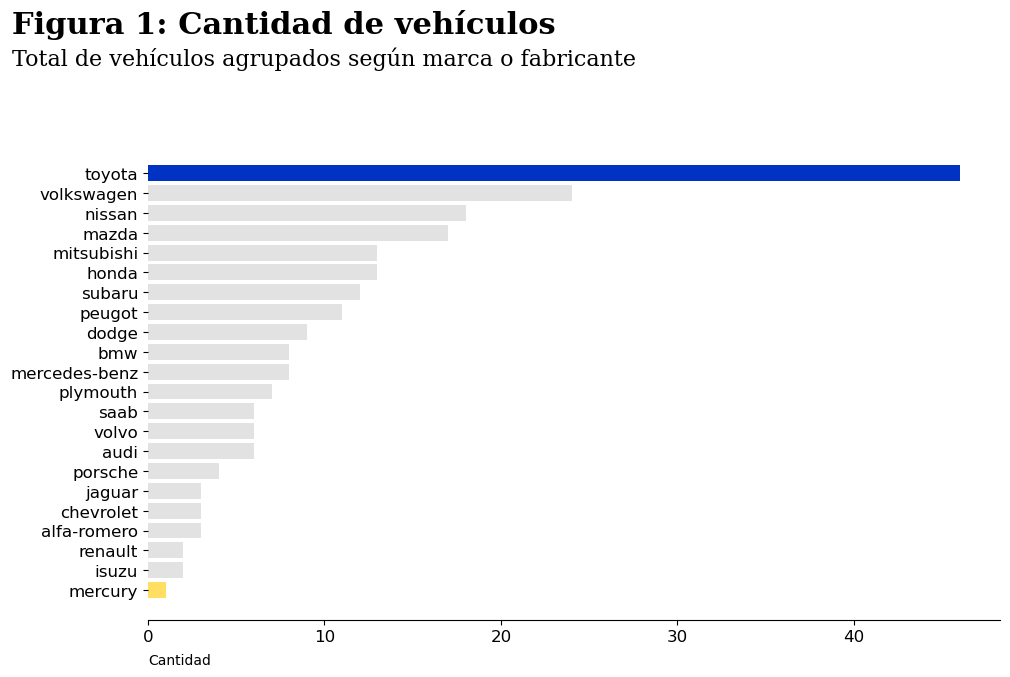

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(11,6.9), dpi=100)

# Datos para generar el gráfico
eje_x = dfGraf.index.tolist()
eje_y = dfGraf["symboling"].tolist()

y_pos = np.arange(len(eje_x))

#Generación de colores para el gráfico
bar_colors = ["#0033c3","#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2",
             "#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2",
             "#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2","#e2e2e2",
             "#e2e2e2","#e2e2e2","#e2e2e2","#ffde62"]
#Creación del gráfico
ax.barh(y_pos, eje_y, align = "center", color = bar_colors)

#Formato del Gráfico
#-------Título y Subtítulo del Gráfico
title_t = "Figura 1: Cantidad de vehículos"
ax.set_title(title_t, #mensaje del título
             horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.001,
             y = 0.96,
             transform = fig.transFigure,
            fontsize = 22,
            fontweight = "bold",
            fontfamily = "serif") 

subtitle_t = "Total de vehículos agrupados según marca o fabricante"
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.94,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "regular",
            fontfamily = "serif")

#-------Etiquetas en Eje X y Y

label = "Cantidad"
ax.set_xlabel(label,
             ha = "left",
             fontsize = 10,
            fontweight = "regular",
            fontfamily = "sans")

ax.xaxis.set_label_coords(x = 0,
                         y = -0.07,
                         transform = ax.transAxes)

ax.tick_params(axis = "both",
             labelsize = 12)

ax.set_yticks(y_pos, labels = eje_x)
ax.invert_yaxis()  
plt.subplots_adjust(top = 0.80)

plt.show()

<h4 Style = "color:#DC143C"¿Cuál es la distribución de los autos segun estilo </h4>

<h4 Style = "color:#cfbe27">¿Cuál es la distribución de los autos según estilo? </h4>

In [49]:
#Se agrupan y cuenta la cantidad de registros según marca
dfGraf1 = dfAutos.groupby(["style"]).count()
#Se selecciona únicamente el índice y la primera columna
dfGraf1 = dfGraf1.iloc[:,:1]
#Se oredenan los datos de mayor a menor
dfGraf1 = dfGraf1.sort_values("symboling", ascending = False)
# Se muestra el dataframe para graficar
dfGraf1

,symboling
style,
sedan,103
hatchback,75
wagon,26
hardtop,10
convertible,8


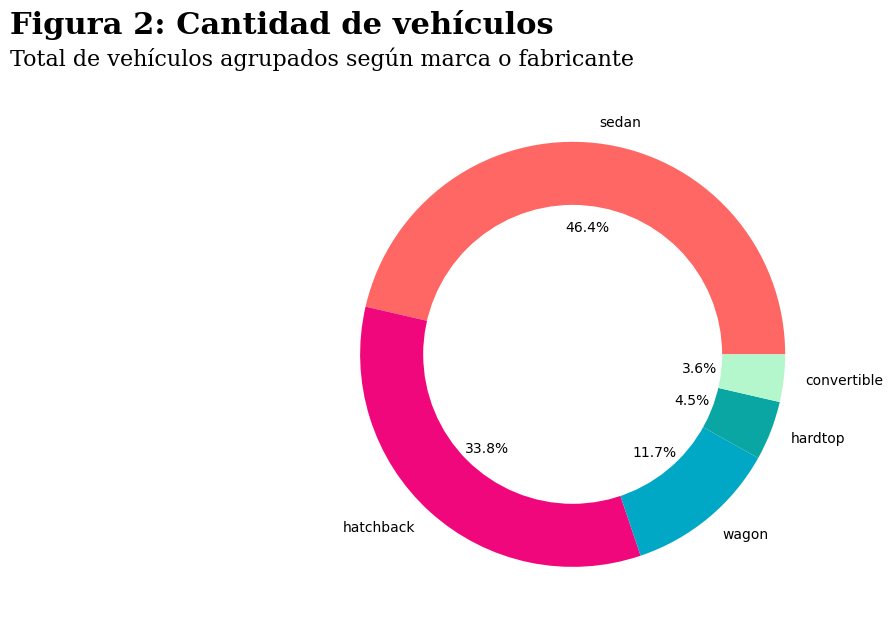

In [50]:
names = dfGraf1.index.tolist()
style = dfGraf1["symboling"].tolist()

fig, ax = plt.subplots(1, 1, figsize=(11,6.9), dpi=100)

circulo = plt.Circle((0,0), 0.7, color = "white") # Este círculo es la base del gráfico de anillos

plt.pie(style, labels = names, autopct = "%1.1f%%", colors = ["#fe6763", "#f0077b", "#00a8c6", "#09a6a3", "#b5f7cd"])

#Formato del Gráfico
#-------Título y Subtítulo del Gráfico
title_t = "Figura 2: Cantidad de vehículos"
ax.set_title(title_t, #mensaje del título
             horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.001,
             y = 0.96,
             transform = fig.transFigure,
            fontsize = 22,
            fontweight = "bold",
            fontfamily = "serif") 

subtitle_t = "Total de vehículos agrupados según marca o fabricante"
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.94,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "regular",
            fontfamily = "serif")

p = plt.gcf()
p.gca().add_artist(circulo)
plt.show()


<h4 Style = "color:#cfbe27"> ¿Cuántos autos existen en el inventario según la cantidad de cilindros? </h4>

In [51]:
#Se agrupan y cuenta la cantidad de registros según marca
dfGraf2 = dfAutos.groupby(["Cylinders"]).sum()
#Se selecciona únicamente el índice y la primera columna
dfGraf2 = dfGraf2.iloc[:,:1]
#Se oredenan los datos de mayor a menor
dfGraf2 = dfGraf2.sort_values("symboling", ascending = False)
# Se muestra el dataframe para graficar
dfGraf2

,symboling
Cylinders,
four,155
six,26
two,12
five,4
eight,3
three,2
twelve,0


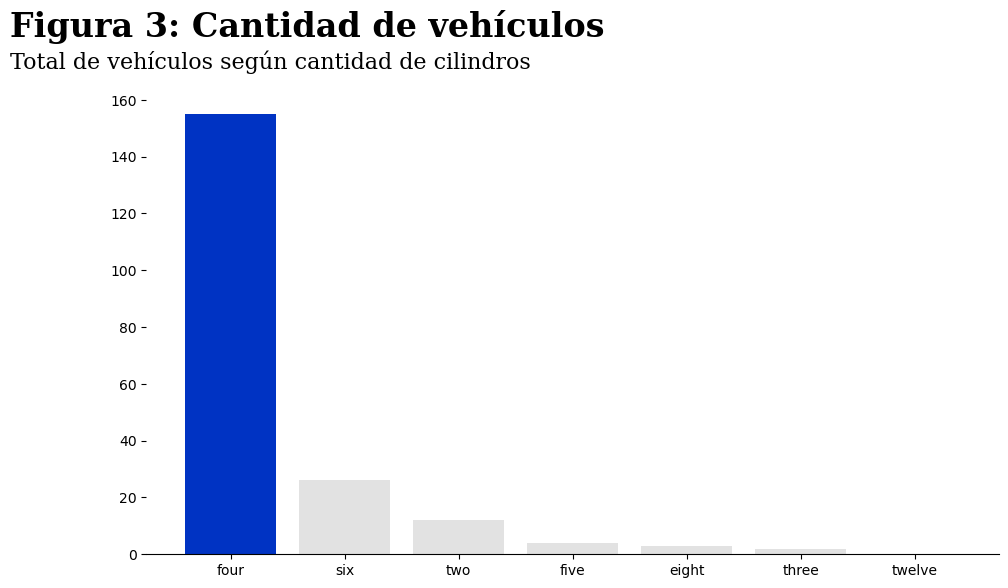

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(11,6.9), dpi=100)

# Datos para generar el gráfico
eje_cyl = dfGraf2.index.tolist()
eje_cant = dfGraf2["symboling"].tolist()

# Definimos colores de barras
bar_colors = ["#0033c3", "#e2e2e2", "#e2e2e2", "#e2e2e2", "#e2e2e2", "#e2e2e2", "#ffde62"]

ax.bar(eje_cyl, eje_cant, label = eje_cyl, color = bar_colors)

#Formato del Gráfico
#-------Título y Subtítulo del Gráfico
title_t = "Figura 3: Cantidad de vehículos"
ax.set_title(title_t, #mensaje del título
             horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.001,
             y = 0.86,
             transform = fig.transFigure,
            fontsize = 24,
            fontweight = "bold",
            fontfamily = "serif") 

subtitle_t = "Total de vehículos según cantidad de cilindros"
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "regular",
            fontfamily = "serif")


plt.subplots_adjust(top = 0.78)

plt.show()

<h4 Style = "color:#cfbe27">¿Existe alguna relación entre el estilo del auto y el precio ? </h4>

In [53]:
df_inf = dfAutos[["style","price"]] #Se genera un nuevo dataFrame para extraer las columnas "estilo" y "precio" del dataFrame dfAutos
df_inf

,style,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0
...,...,...
217,sedan,13845.0
218,wagon,12290.0
219,sedan,12940.0
220,wagon,13415.0


In [54]:
#Se agrupan y calculan las medias o promedios de la columna "precio" según "estilo para igual # de filas en ambas columnas"
dfGraf3 = df_inf.groupby(["style"]).mean()
#Se selecciona únicamente el índice y la primera columna
dfGraf3 = dfGraf3.iloc[:,:1]
#Se oredenan los datos de mayor a menor
dfGraf3 = dfGraf3.sort_values("price", ascending = False).astype(int)
dfGraf3

,price
style,
convertible,20075
hardtop,19850
sedan,13597
wagon,12126
hatchback,10165


In [55]:
#Se agrupan y cuenta la cantidad de registros según estilo
dfGraf4 = dfAutos.groupby(["style"]).count()
#Se selecciona únicamente el índice y la primera columna
dfGraf4 = dfGraf4.iloc[:,:1]
#Se oredenan los datos de mayor a menor
dfGraf4 = dfGraf4.sort_values("symboling", ascending = False)
dfGraf4

,symboling
style,
sedan,103
hatchback,75
wagon,26
hardtop,10
convertible,8


In [56]:
data_corr = pd.concat([dfGraf4, dfGraf3], axis = 1) # se unen las columnas de datos calculados en un nuevo dataFrame para analizar la correlación
data_corr

,symboling,price
style,,
sedan,103,13597
hatchback,75,10165
wagon,26,12126
hardtop,10,19850
convertible,8,20075


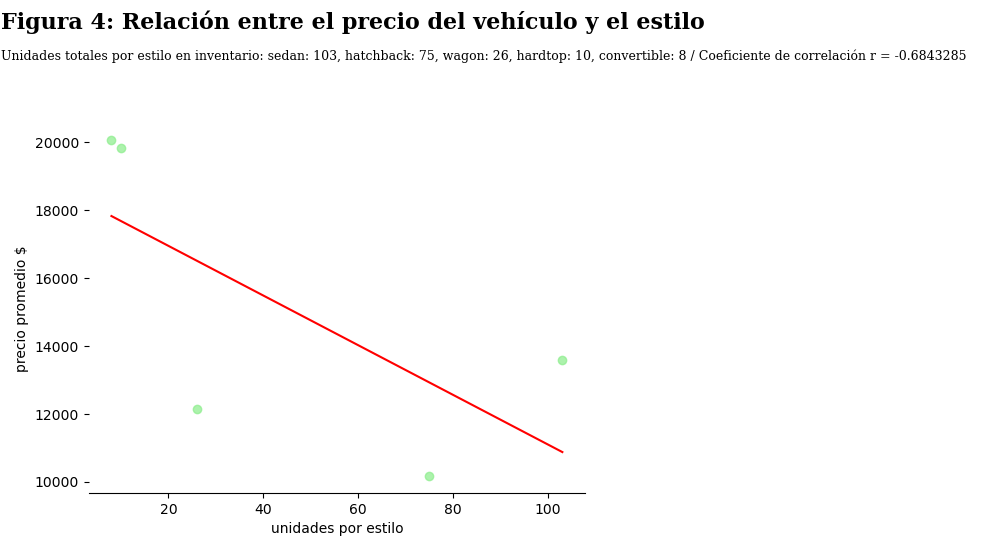

In [57]:
plt.scatter(data_corr["symboling"], data_corr["price"], c = "lightgreen", alpha = 0.75)
reg_line = np.polyfit(data_corr["symboling"], data_corr["price"], deg = 1)
trend = np.polyval(reg_line, data_corr["symboling"])

plt.xlabel("unidades por estilo")
plt.ylabel("precio promedio $") 

title_t = "Figura 4: Relación entre el precio del vehículo y el estilo"
plt.title(title_t, #mensaje del título
            horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.001,
             y = 0.75,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "bold",
            fontfamily = "serif") 

subtitle_t = "Unidades totales por estilo en inventario: sedan: 103, hatchback: 75, wagon: 26, hardtop: 10, convertible: 8 / Coeficiente de correlación r = -0.6843285"
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
             x = 0.001,
             y = 0.72,
            transform = fig.transFigure,
            fontsize = 9,
            fontweight = "regular",
            fontfamily = "serif")

plt.plot(data_corr["symboling"], trend, "r");

In [58]:
coef_Corr = np.corrcoef(data_corr["symboling"], data_corr["price"]) #Se calcula el coeficiente de correlación r o la relación entre las 2 variables
coef_Corr

array([[ 1.       , -0.6843285],
       [-0.6843285,  1.       ]])

In [59]:
r2 = coef_Corr #Se calcula el coeficiente de determinación r^2 para explicar la bondad del ajuste del modelo explicando la varianza total de la variable de estudio
pow(r2,2)

array([[1.        , 0.46830549],
       [0.46830549, 1.        ]])

<h4 Style = "color:#cfbe27"> ¿Cuál es la variable que más se correlaciona con el precio del vehículo? </h4>

In [60]:
cormat = dfAutos.corr()

In [61]:
cormat["price"].sort_values(ascending = False)

price             1.000000
engineSize        0.866309
curb              0.825663
horsepower        0.799772
Higway L/100Km    0.791994
City L/100Km      0.785222
width             0.734495
widthNorm         0.734495
lengthNorm        0.668274
length            0.668274
base              0.559529
bore              0.522376
normalized        0.171369
heingt            0.091559
heingtNorm        0.091559
stroke            0.077425
compression       0.034363
symboling        -0.042920
peak             -0.086290
City             -0.673171
Higway           -0.686843
Name: price, dtype: float64

In [62]:
c= 10
cols = cormat.nlargest(c,"price")["price"].index
cols

Index(['price', 'engineSize', 'curb', 'horsepower', 'Higway L/100Km',
       'City L/100Km', 'width', 'widthNorm', 'lengthNorm', 'length'],
      dtype='object')

In [63]:
cm = np.corrcoef(dfAutos[cols].values.T)


<function matplotlib.pyplot.show(close=None, block=None)>

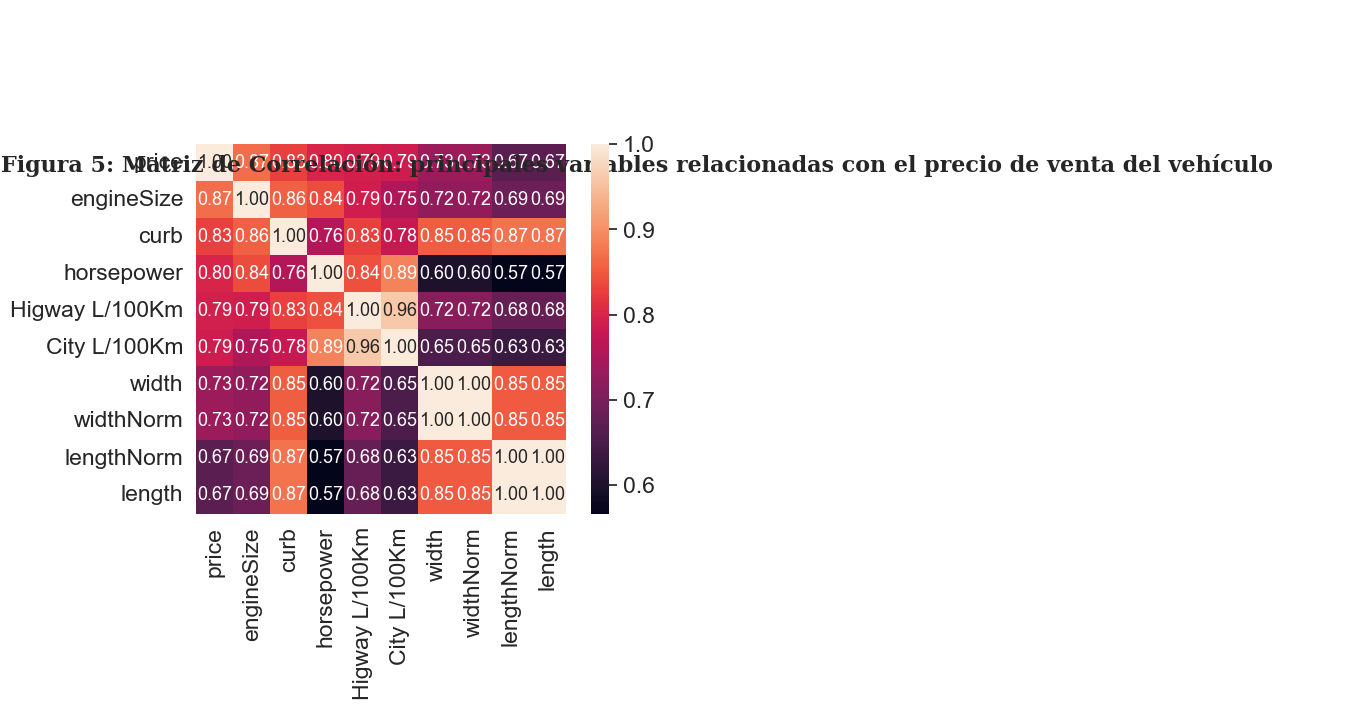

In [64]:
sns.set(font_scale = 1.50)

matriz_corr = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size":13,}, 
                yticklabels = cols.values, xticklabels = cols.values)

title_t = "Figura 5: Matriz de Correlación: principales variables relacionadas con el precio de venta del vehículo"
plt.title(title_t, #mensaje del título
            horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.001,
             y = 0.78,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "bold",
            fontfamily = "serif") 
plt.show

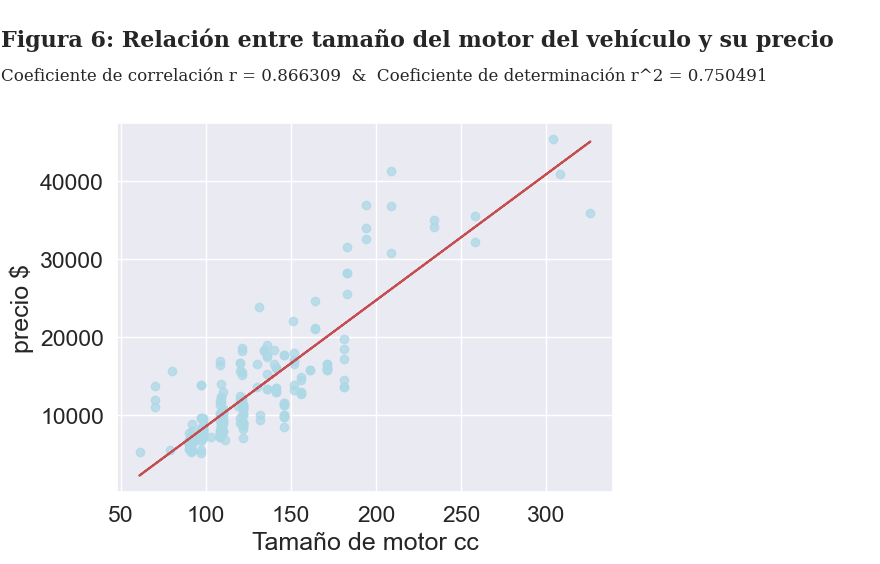

In [65]:
plt.scatter(dfAutos["engineSize"], dfAutos["price"], c = "lightblue", alpha = 0.75)
reg = np.polyfit(dfAutos["engineSize"], dfAutos["price"], deg = 1)
trend = np.polyval(reg, dfAutos["engineSize"])

plt.xlabel("Tamaño de motor cc")
plt.ylabel("precio $") 

title_t = "Figura 6: Relación entre tamaño del motor del vehículo y su precio"
plt.title(title_t, #mensaje del título
            horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.001,
             y = 0.75,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "bold",
            fontfamily = "serif") 

subtitle_t = "Coeficiente de correlación r = 0.866309" "  " "&" "  " "Coeficiente de determinación r^2 = 0.750491"
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
             x = 0.001,
             y = 0.72,
            transform = fig.transFigure,
            fontsize = 12,
            fontweight = "regular",
            fontfamily = "serif")

plt.plot(dfAutos["engineSize"], trend, "r");

<h4 Style = "color:#cfbe27"> ¿Influye el tamaño y el estilo en el precio del vehículo? </h4>

In [66]:
dfTemp = dfAutos[["length","width","heingt"]]
dfTemp

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
...,...,...,...
217,180.2,66.9,55.1
218,183.1,66.9,55.1
219,188.8,67.2,56.2
220,188.8,67.2,57.5


In [67]:
dfAutos["Dimension"] = (dfAutos["length"] * dfAutos["width"] * dfAutos["heingt"])/1000 #calculo las dimensiones de los vehúculos y divido entre 1000 para tener un dato más fácil de graficar
dfVol = dfAutos[["Dimension"]]
dfVol

,Dimension
0,528.019904
1,528.019904
2,587.592640
3,634.816956
4,636.734832
...,...
217,664.251438
218,674.941389
219,713.029632
220,729.523200


In [68]:
bins = np.linspace(min(dfAutos["Dimension"]), max(dfAutos["Dimension"]), 4) 
bins

array([452.643156, 583.764657, 714.886158, 846.007659])

In [69]:
groupNames = ["Small", "Medium", "Large"] #Clasifico en 3 categorías las dimensiones de los vehículos
dfAutos["DimensionCars"] = pd.cut(dfAutos["Dimension"], bins, labels = groupNames, include_lowest = True)
dfAutos[["Dimension", "DimensionCars"]]

,Dimension,DimensionCars
0,528.019904,Small
1,528.019904,Small
2,587.592640,Medium
3,634.816956,Medium
4,636.734832,Medium
...,...,...
217,664.251438,Medium
218,674.941389,Medium
219,713.029632,Medium
220,729.523200,Large


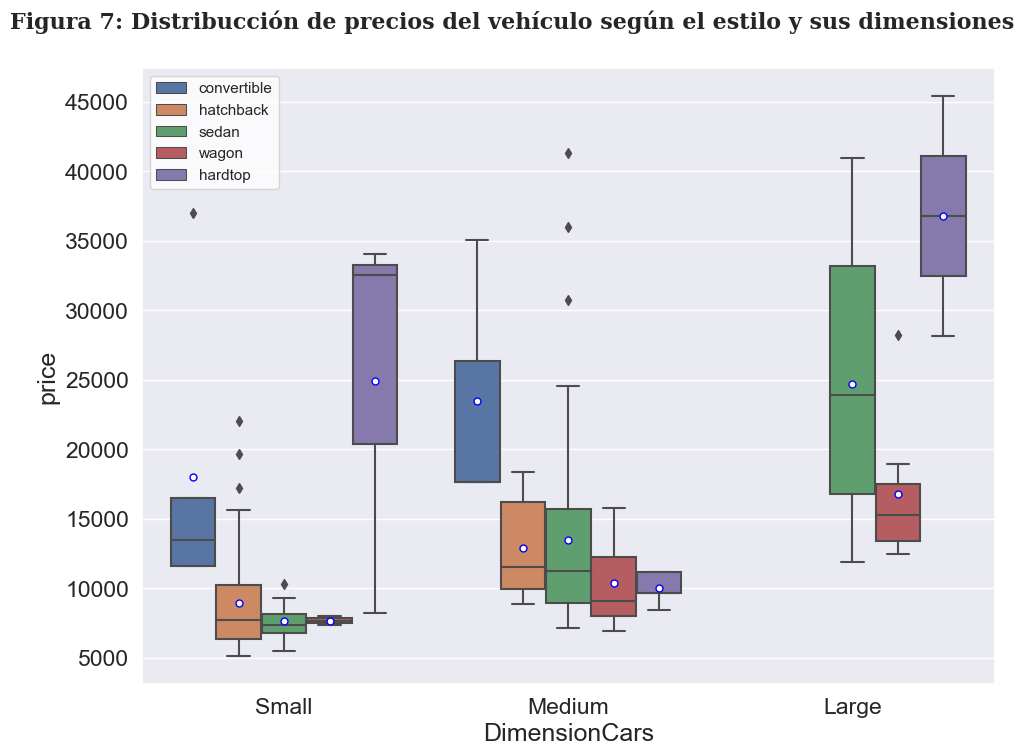

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(11,8), dpi=100)

data= dfAutos[["DimensionCars","price", "style"]] # Mediante un gráfico de cajas observo la distribución de precios de los vehículos según sus dimensiones y estilo

sns.set(style = "whitegrid")

ax =sns.boxplot(x="DimensionCars", y="price", hue= "style", data= data, showmeans = True,meanprops={"marker":"o","markerfacecolor":"white","markersize":"5","markeredgecolor":"blue"})


title_t = "Figura 7: Distribucción de precios del vehículo según el estilo y sus dimensiones"
plt.title(title_t, #mensaje del título
            horizontalalignment = "left", # se define posición del texto al lado izquierdo
             x = 0.005,
             y = 0.93,
            transform = fig.transFigure,
            fontsize = 16,
            fontweight = "bold",
            fontfamily = "serif") 

plt.legend(loc = "upper left")

plt.show()